# Creating plot of weekly drift on daily wind on daily size

## Import packages

In [1]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

/var/folders/1y/8_442fb923bb526xtrg6y2p80000gr/T/ipykernel_27472/4216081847.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_daily = pd.to_datetime(df_daily_size.time)


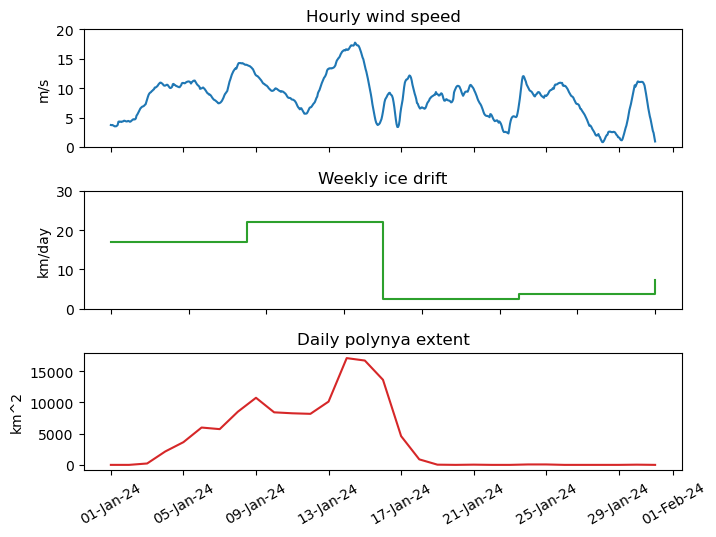

In [57]:
#read in the data files
df_hourly_wind = pd.read_csv("/Users/reu/Box/Data/hourly_speeds_wind_v2.csv")
df_wk_drift = pd.read_csv('/Users/reu/Box/Data/weekly_speeds_drift.csv')
df_daily_size = pd.read_csv("/Users/reu/Box/Data/SIC.csv")

#converting the times to the correct format
time_daily = pd.to_datetime(df_daily_size.time)
time_weekly = pd.to_datetime(df_wk_drift.time)
time_hourly = pd.to_datetime(df_hourly_wind.time)


fig, ax = plt.subplots(3, 1, figsize = (7,5))

labeldata = ("m/s", "km/day", "km^2")

for i, (unit) in enumerate(labeldata):
    ax[i].set_ylabel(unit)
plt.tight_layout()

ax[0].plot(time_hourly, df_hourly_wind.uv_wind, 'tab:blue', label='uv wind (m/s)')
ax[0].set_title('Hourly wind speed')
ax[0].set_ylim(0,20)

ax[1].step(time_weekly, df_wk_drift.weekly_avg_uv, 'tab:green', where = 'post', label = 'weekly drift (km/day)')
ax[1].set_title('Weekly ice drift')
ax[1].set_ylim(0,30)

ax[2].plot(time_daily, df_daily_size.Open_water_extent, 'tab:red', label = 'open water extent (km^2)')
ax[2].set_title('Daily polynya extent')

for ax in ax.flat:
    ax.label_outer()

plt.xticks(rotation=30)
# plt.xticks(time_daily)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))



In [ ]:
## stick plot
#starts an array

fig, ax = plt.subplots(figsize = (20, 5))
qv = plt.quiver(date_list, np.zeros_like(date_list), u10_average, v10_average, width=0.003)
qk = ax.quiverkey(qv, 10, 10, 5, r'$20 \frac{km}{day}$',labelpos='E' )

#why is it not showing up!

# save figure, if desired
# save_path = f'/Users/reu/Desktop/quiver.png'
# fig.savefig(save_path, dpi=300, bbox_inches = 'tight')

#formatting the plot
plt.xticks(rotation=30)
plt.xticks(date_list)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
plt.yticks([])
#labels
plt.xlabel('Date')
#ax.axvspan(datetime(2024, 1, 10), datetime(2024, 1, 15), facecolor='silver', alpha=0.5)

plt.title(f'u-v wind {date_list[0].strftime("%d-%b-%Y")} to {date_list[-1].strftime("%d-%b-%Y")} over polynya')